In [5]:
import pandas as pd 
import numpy as np

train = pd.read_csv('train.csv')
train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [2]:
#linear regression model with outcome variable being target
#write it man

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame and it includes a 'target' column
X = train.drop('target', axis=1)  # feature columns
y = train['target']  # target column


#can u remove the NaNs
X = X.fillna(0)
y = y.fillna(0)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Now the model is trained and you can use model.predict() to make predictions

model.predict(X_test)

array([-0.0075966 ,  0.06851923, -1.01702748, ..., -0.4366326 ,
        2.46220483, -0.99759714])

In [3]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming X is your feature set and y is the target variable
for i in range (1,13):
    selector = SelectKBest(f_regression, k=i)

    # Fit transform the data
    X_new = selector.fit_transform(X, y)

    # Get the feature names
    mask = selector.get_support()  # list of booleans for selected features
    new_features = []  # The list of your K best features

    for bool, feature in zip(mask, X.columns):
        if bool:
            new_features.append(feature)

    print('The best features are: ', new_features)

KeyboardInterrupt: 

In [ ]:
top1 = ['bid_size']
top2 =  ['imbalance_buy_sell_flag', 'bid_size']
top3 =   ['imbalance_buy_sell_flag', 'bid_size', 'ask_size']
top4 =   ['imbalance_buy_sell_flag', 'bid_size', 'ask_size', 'wap']
top5 =   ['imbalance_buy_sell_flag', 'bid_price', 'bid_size', 'ask_size', 'wap']
top6 =   ['imbalance_buy_sell_flag', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap']
top7 =   ['imbalance_buy_sell_flag', 'reference_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap']
top8 =   ['seconds_in_bucket', 'imbalance_buy_sell_flag', 'reference_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap']
top9 =   ['seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap']
top10 =  ['seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap']
top11 =  ['seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'row_id']
top12 =  ['date_id', 'seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'row_id']

In [13]:
#MAE when all features r used
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, model.predict(X_test))

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [ ]:
#runnning regression on all top 12 features
tops = [top1, top2, top3, top4, top5, top6, top7, top8, top9, top10, top11, top12]

for i in range (0,12):
    X = train[tops[i]]  # feature columns
    y = train['target']  # target column


    #can u remove the NaNs
    X = X.fillna(0)
    y = y.fillna(0)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Now the model is trained and you can use model.predict() to make predictions

    model.predict(X_test)
    mae = mean_absolute_error(y_test, model.predict(X_test))

    print('MAE for top', i+1, 'features is', mae)



MAE for top 1 features is 6.4108363083142725
MAE for top 2 features is 6.410141069526442
MAE for top 3 features is 6.407456181293434
MAE for top 4 features is 6.406910213884661
MAE for top 5 features is 6.383517860414299
MAE for top 6 features is 6.332886774866157
MAE for top 7 features is 6.327004219261476
MAE for top 8 features is 6.326974768047381
MAE for top 9 features is 6.326986918746517
MAE for top 10 features is 6.326753569743947
MAE for top 11 features is 6.326752152282785
MAE for top 12 features is 6.326753615837946


In [ ]:
tops = [top1, top2, top3, top4, top5, top6, top7, top8, top9, top10, top11, top12]
a = train[tops[2]]
top1

['bid_size']

In [ ]:
#try another model now for the data
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X = train[['ask_price', 'wap']]  # feature columns
y = train['target']  # target column

#can u remove the NaNs
X = X.fillna(0)
y = y.fillna(0)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestRegressor(n_estimators=10, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
mean_absolute_error(y_test, clf.predict(X_test))

print ("Mae for random forest is", mean_absolute_error(y_test, clf.predict(X_test)))

Mae for random forest is 6.4095719408404


In [ ]:
#top features for random forest
importances = clf.feature_importances_
print (importances)

#how do i know what feature is the vector referring to

train.columns


[0.18206414 0.81793586]


Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id'],
      dtype='object')

# CATBoost 

## Some feature engineering

In [6]:
#based on some domain knowledge and some research and reading a few threads on kaggle, did some feature engineering

#liquidity imbalance
train['liquidity_imbalance'] = (train['ask_size'] - train['bid_size']) / (train['ask_size'] + train['bid_size'])

#matched imbalance
train['matched_imbalance'] = (train['imbalance_size']-train['matched_size'])/ (train['matched_size']+train['imbalance_size'])

#spread
train['spread'] = train['ask_price'] - train['bid_price']

#mid price - might be close to what the stock is traded (if less liquidity)
train['mid_price'] = (train['ask_price'] + train['bid_price'])/2

#bid-ask ratio
train['bid_ask_ratio'] = train['bid_size']/train['ask_size']

#other features

#price difference between the last trade and the current best bid price

In [7]:
train = train.dropna(subset=["target"])
train.reset_index(drop=True, inplace=True)

In [8]:
features = [col for col in train.columns if col not in ['row_id', 'time_id', 'target']]
X = train[features].copy(deep=True)
y = train['target'].copy(deep=True)

### Also creating a Validation set

In [15]:
number_of_days = len(X.date_id.unique()) # 10 out of 481 days are used for testing
testing_days = 10
training_days = number_of_days - testing_days
training_days, testing_days

# mask to grab the days for training and testing
training_mask = X.date_id <= training_days
testing_mask = X.date_id > training_days

# subset and make training and validation sets
X_train, X_val, y_train, y_val = X[training_mask], X[testing_mask], y[training_mask], y[testing_mask] #train_test_split(X, y, test_size=0.20, random_state=0, shuffle=True, stratify=X['stock_id']) # random_state=8
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5138892, 19), (99000, 19), (5138892,), (99000,))

In [16]:
from catboost import CatBoostRegressor
from catboost import EShapCalcType, EFeaturesSelectionAlgorithm
from catboost import Pool
import shap

In [17]:
train_pool = Pool(data=X_train, label=y_train)# , cat_features=cat_features) # , cat_features=cat_features
val_pool = Pool(data=X_val, label=y_val)#, cat_features=cat_features) # , cat_features=cat_features

In [21]:
params = dict(loss_function ='MAE',
              eval_metric= "MAE",
              metric_period = 100,
              bootstrap_type = "Bernoulli",
              od_type = 'Iter',
              od_wait = 20,
              border_count = 32,
              #use_best_model = True,
              task_type = 'GPU',
              random_seed=7,
              iterations = 1000,
              subsample=0.779472827911377,
              random_strength=11.285714149475098, # more bagging to reduce overfitting
              depth=8,
              l2_leaf_reg=33,
              learning_rate=0.01,
              )


model = CatBoostRegressor(**params)

In [22]:
# https://medium.com/analytics-vidhya/catboost-101-fb2fdc3398f3
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Retrain the model with the recommended number of iterations and the reduced feature set
final_params = params.copy()
updates = dict(#score_function='Cosine'
              )
final_params.update(updates)
print(final_params)
final_model = CatBoostRegressor(**final_params)
final_model.fit(X_train, #[summary['selected_features_names']],  # 
                y_train,
                eval_set=(X_val, y_val)) # [summary['selected_features_names']]

print("-----Predicting with the reduced set model-----------")
y_val_pred = final_model.predict(X_val) # [summary['selected_features_names']]
y_val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"MAE on validation set: {np.round(y_val_mae, 4)}")

{'loss_function': 'MAE', 'eval_metric': 'MAE', 'metric_period': 100, 'bootstrap_type': 'Bernoulli', 'od_type': 'Iter', 'od_wait': 20, 'border_count': 32, 'task_type': 'GPU', 'random_seed': 7, 'iterations': 1000, 'subsample': 0.779472827911377, 'random_strength': 11.285714149475098, 'depth': 8, 'l2_leaf_reg': 33, 'learning_rate': 0.01}
0:	learn: 6.4220108	test: 5.6513542	best: 5.6513542 (0)	total: 26.7ms	remaining: 26.6s
100:	learn: 6.4148015	test: 5.6463712	best: 5.6463712 (100)	total: 2.58s	remaining: 23s
200:	learn: 6.4082269	test: 5.6419381	best: 5.6419381 (200)	total: 5.11s	remaining: 20.3s
300:	learn: 6.4021789	test: 5.6378725	best: 5.6378725 (300)	total: 7.67s	remaining: 17.8s
400:	learn: 6.3966061	test: 5.6341862	best: 5.6341862 (400)	total: 10.2s	remaining: 15.2s
500:	learn: 6.3914828	test: 5.6308933	best: 5.6308933 (500)	total: 12.8s	remaining: 12.7s
600:	learn: 6.3867795	test: 5.6279236	best: 5.6279236 (600)	total: 15.4s	remaining: 10.2s
700:	learn: 6.3824638	test: 5.6252330	

Top 10 features

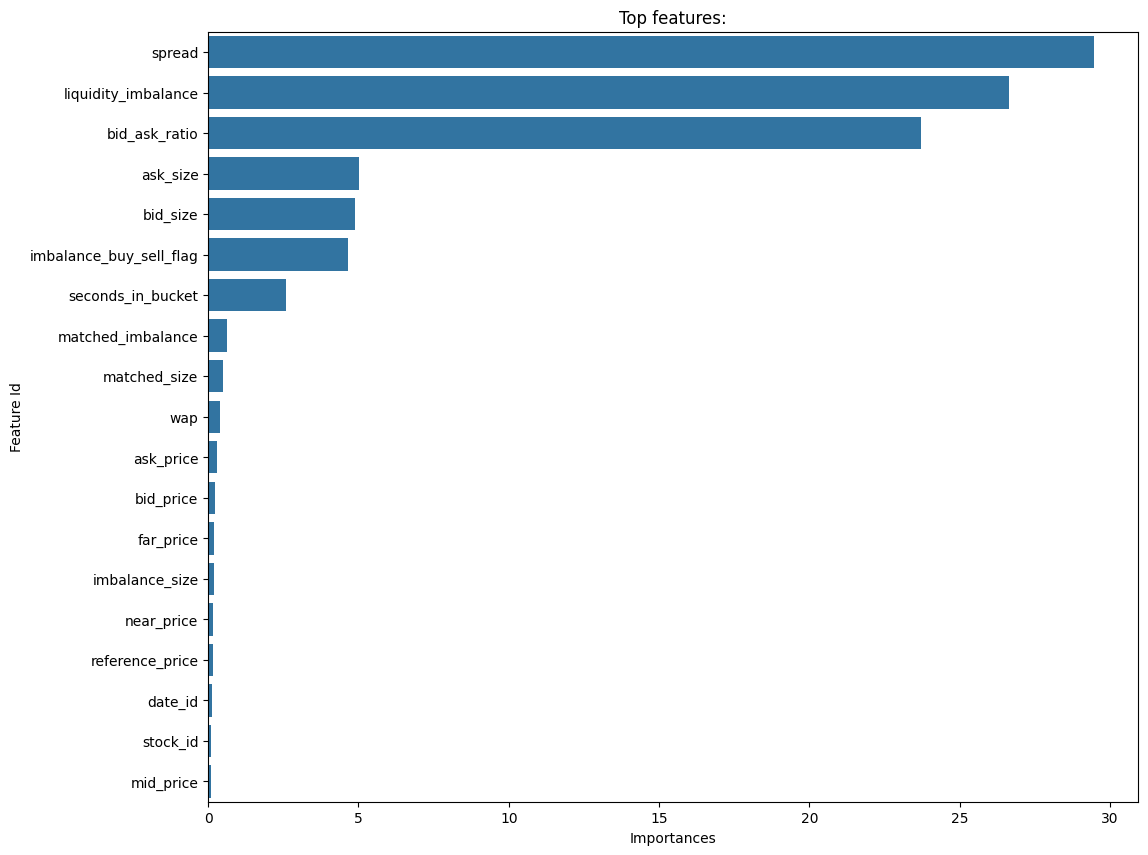

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = final_model.get_feature_importance(prettified=True)

plt.figure(figsize=(12, 10))
sns.barplot(x="Importances", y="Feature Id", data=feat_importances[0:20])
plt.title('Top features:');

In [ ]:
#check MAE on testing set

#check MAE on testing set
test = pd.read_csv('test.csv')
test.head()





In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237892 entries, 0 to 5237891
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
 17  liquidity_imbalance      float64
 18  matched_imbalance        float64
 19  spread                   float64
 20  mid_price                float64
 21  bid_ask_



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



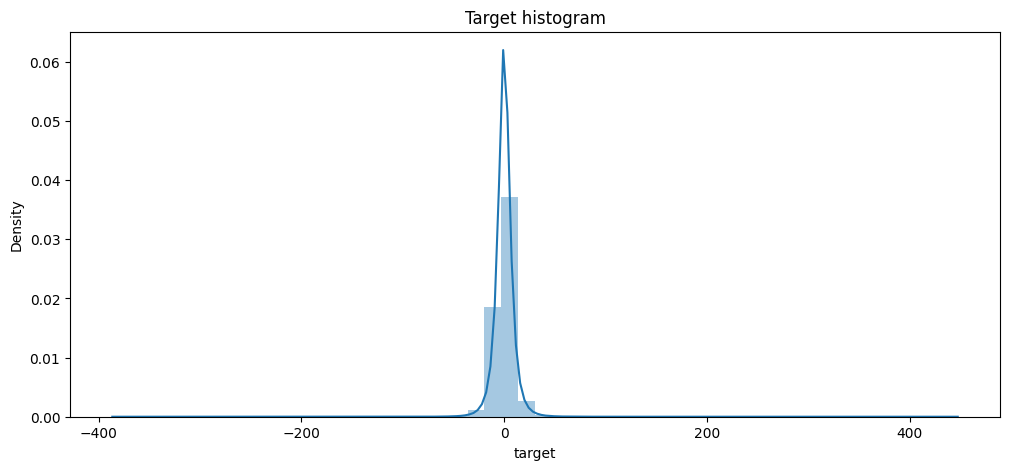

In [27]:
plt.figure(figsize=(12,5))
plt.title("Target histogram")
ax = sns.distplot(train['target'])